In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports & Configs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
df=pd.read_csv('airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


## Missing Data

In [8]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Arrival Delay: 393 (0.303%)


Missing values are very few! we can just fill them with the median

In [9]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

## Duplicates 

In [10]:
df.duplicated().sum()

0

Great! No duplicates

## Outliers 

------------------------------
Flight Distance:


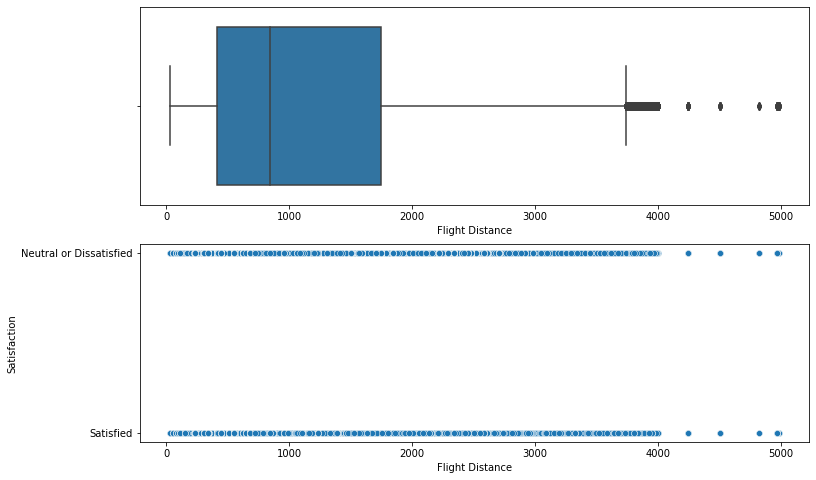

------------------------------
Departure Delay:


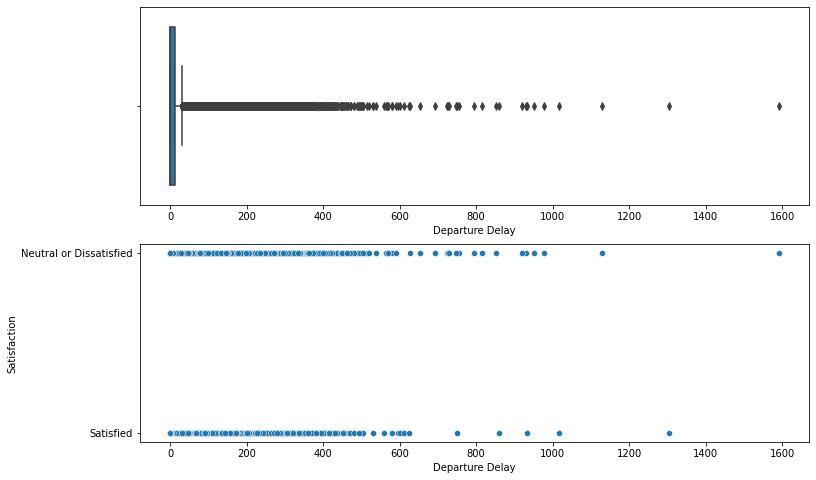

------------------------------
Arrival Delay:


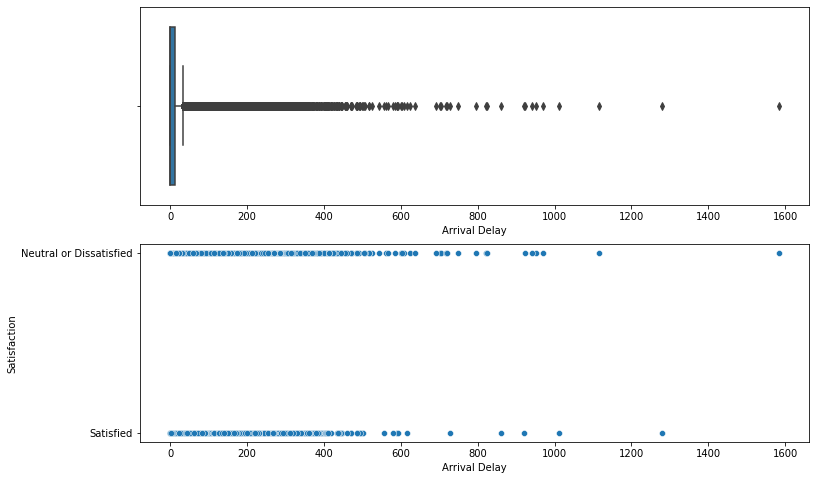

In [11]:
for col in df:
    if col != 'Satisfaction' and col in ['Flight Distance', 'Departure Delay', 'Arrival Delay']:
        print('-'*30)
        print(f"{col}:")
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = df[col], ax=ax[0])
        g2 = sns.scatterplot(data=df, x=df[col],y=df['Satisfaction'], ax=ax[1])
        plt.show()

In [12]:
valid_data = {'Flight Distance': 4000, 'Departure Delay': 500, 'Arrival Delay': 500}

for k in valid_data:
    print(f'Number of outliers for {k} is {df[df[k] >= valid_data[k]].shape[0]}')

for k in valid_data:
    df = df[df[k] < valid_data[k]]

Number of outliers for Flight Distance is 90
Number of outliers for Departure Delay is 43
Number of outliers for Arrival Delay is 42


# EDA

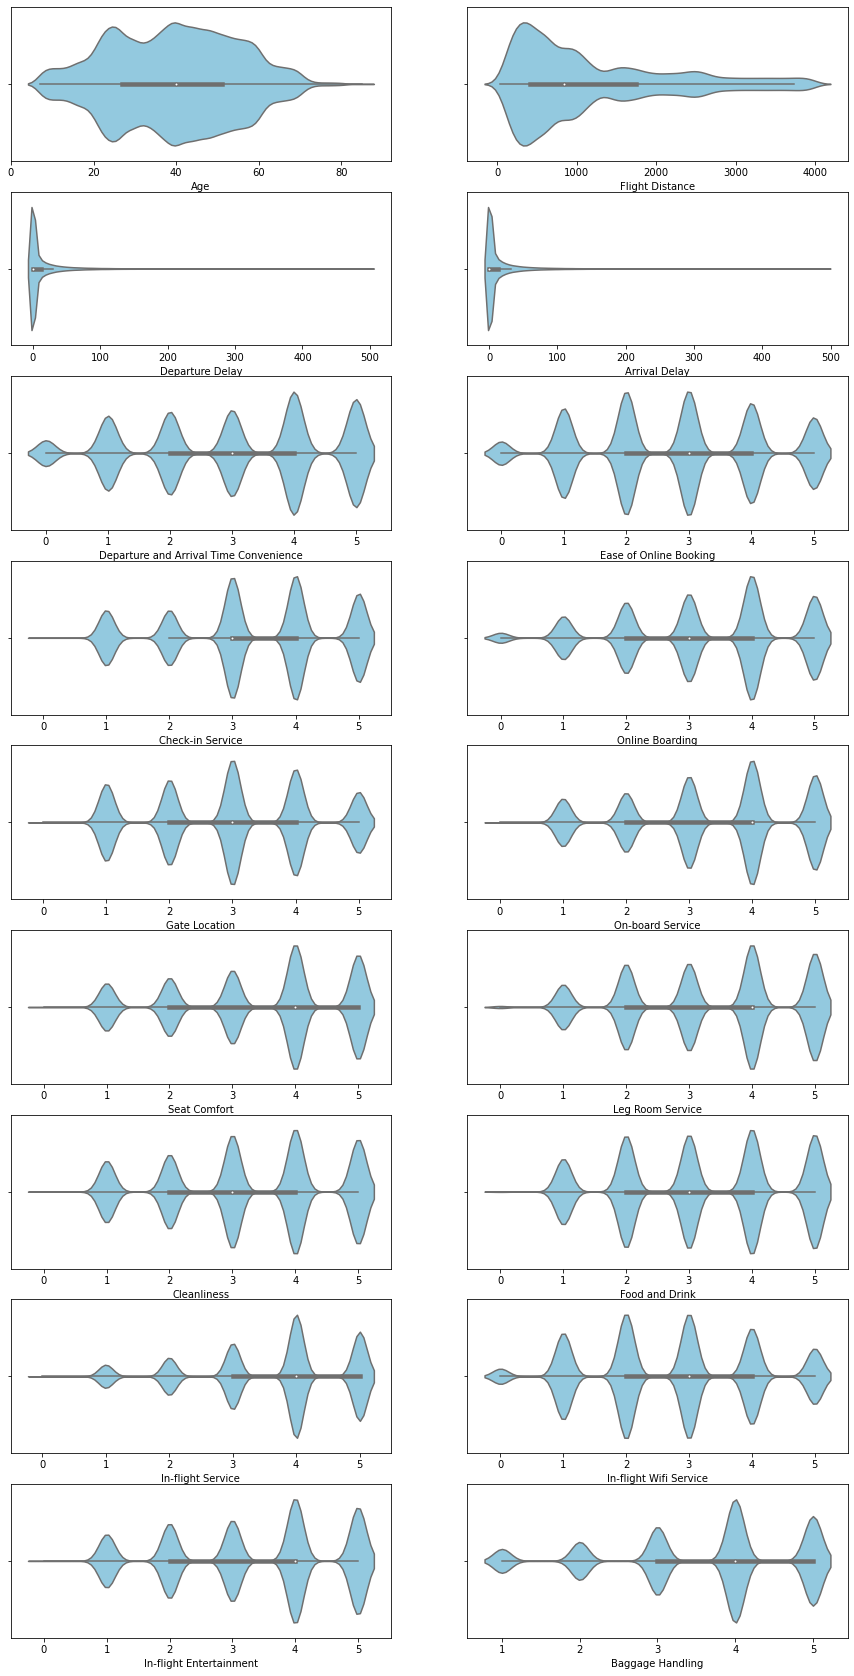

In [13]:
f, axes = plt.subplots(9, 2, figsize=(15,30), sharex=False)
idx, idy = 0, 0
for i in range(1,24):
    if is_numeric_dtype(df.iloc[:,i]):
        sns.violinplot(x=df.iloc[:,i], color="skyblue", ax=axes[idx,idy])
        idx += idy
        idy = int(not idy)
plt.show()

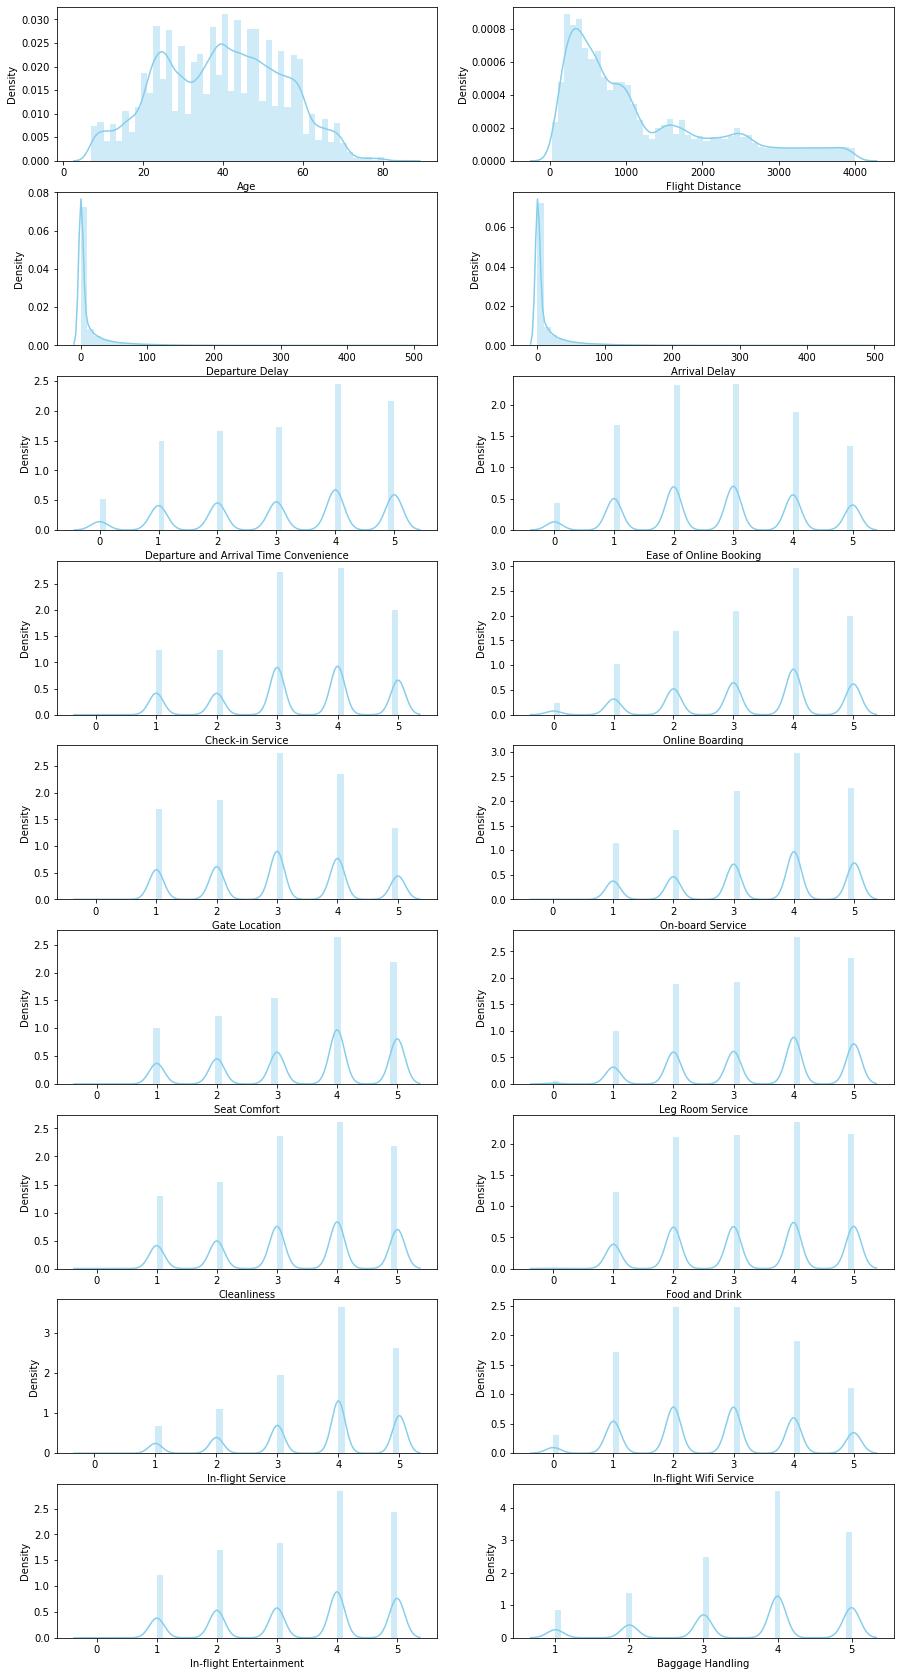

In [14]:
f, axes = plt.subplots(9, 2, figsize=(15,30), sharex=False)
idx, idy = 0, 0
for i in range(1, 24):
    if is_numeric_dtype(df.iloc[:,i]):
        plot = sns.distplot(x=df.iloc[:,i], color="skyblue", ax=axes[idx,idy])
        plot.set(xlabel=df.columns[i])
        idx += idy
        idy = int(not idy)
plt.show()

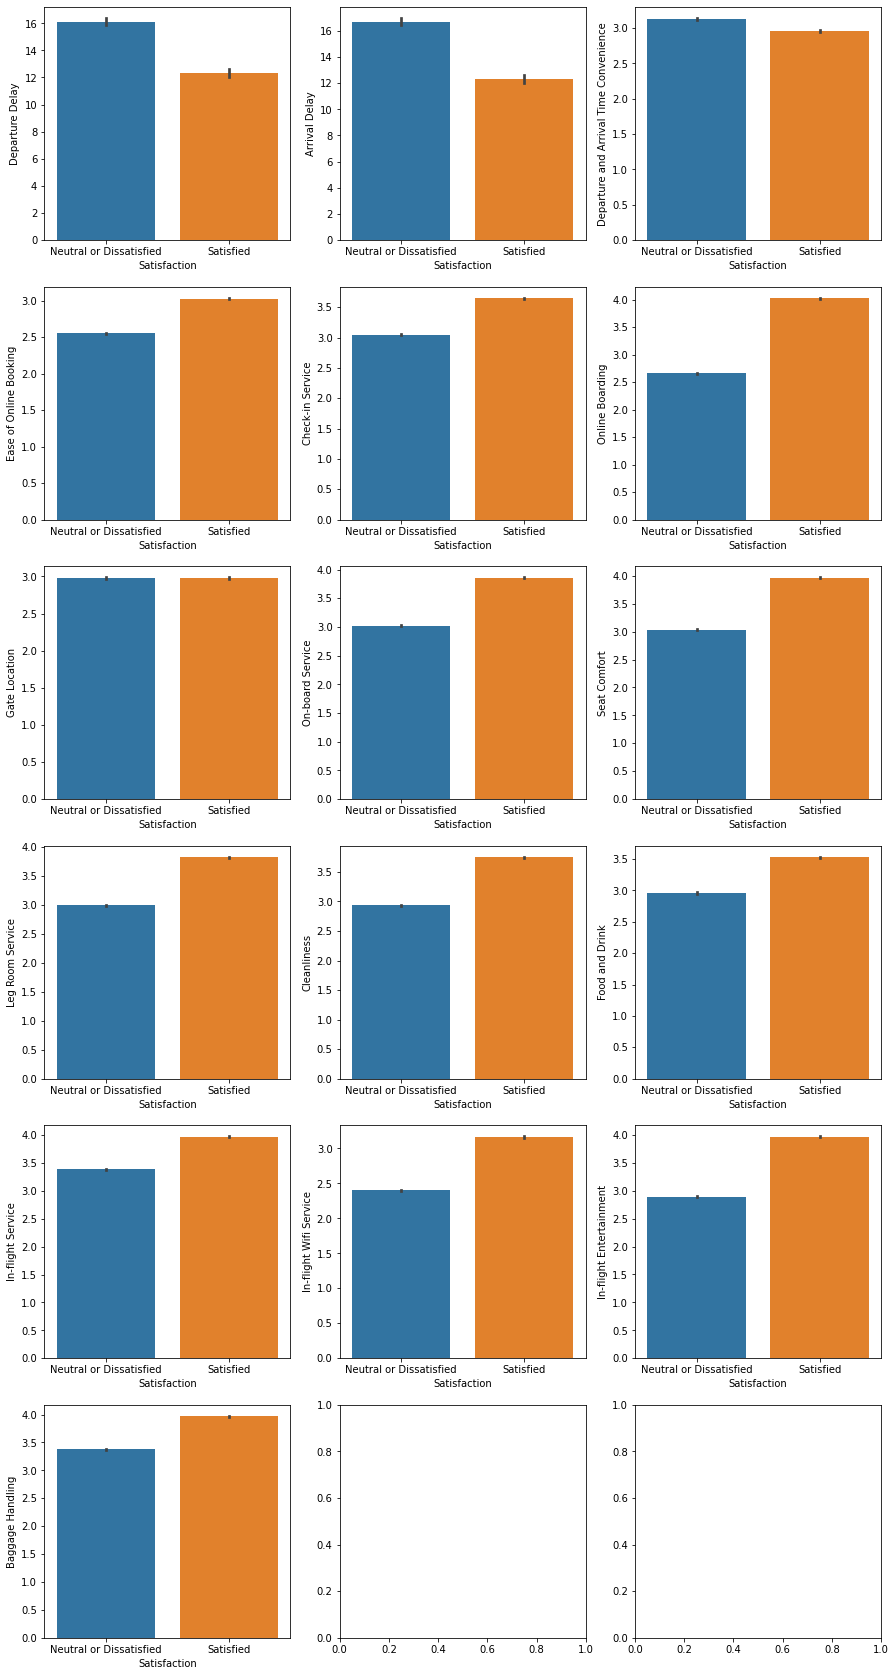

In [15]:
f, axes = plt.subplots(6, 3, figsize=(15,30), sharex=False)

idx, idy = 0, 0
for i in range(7, 24):
    if is_numeric_dtype(df.iloc[:,i]):
        sns.barplot(x="Satisfaction", y=df.columns[i], data=df, ax=axes[idx,idy])
        idx += 1 if idy == 2 else 0
        idy = idy + 1 if idy < 2 else 0
        
plt.show()

<AxesSubplot:>

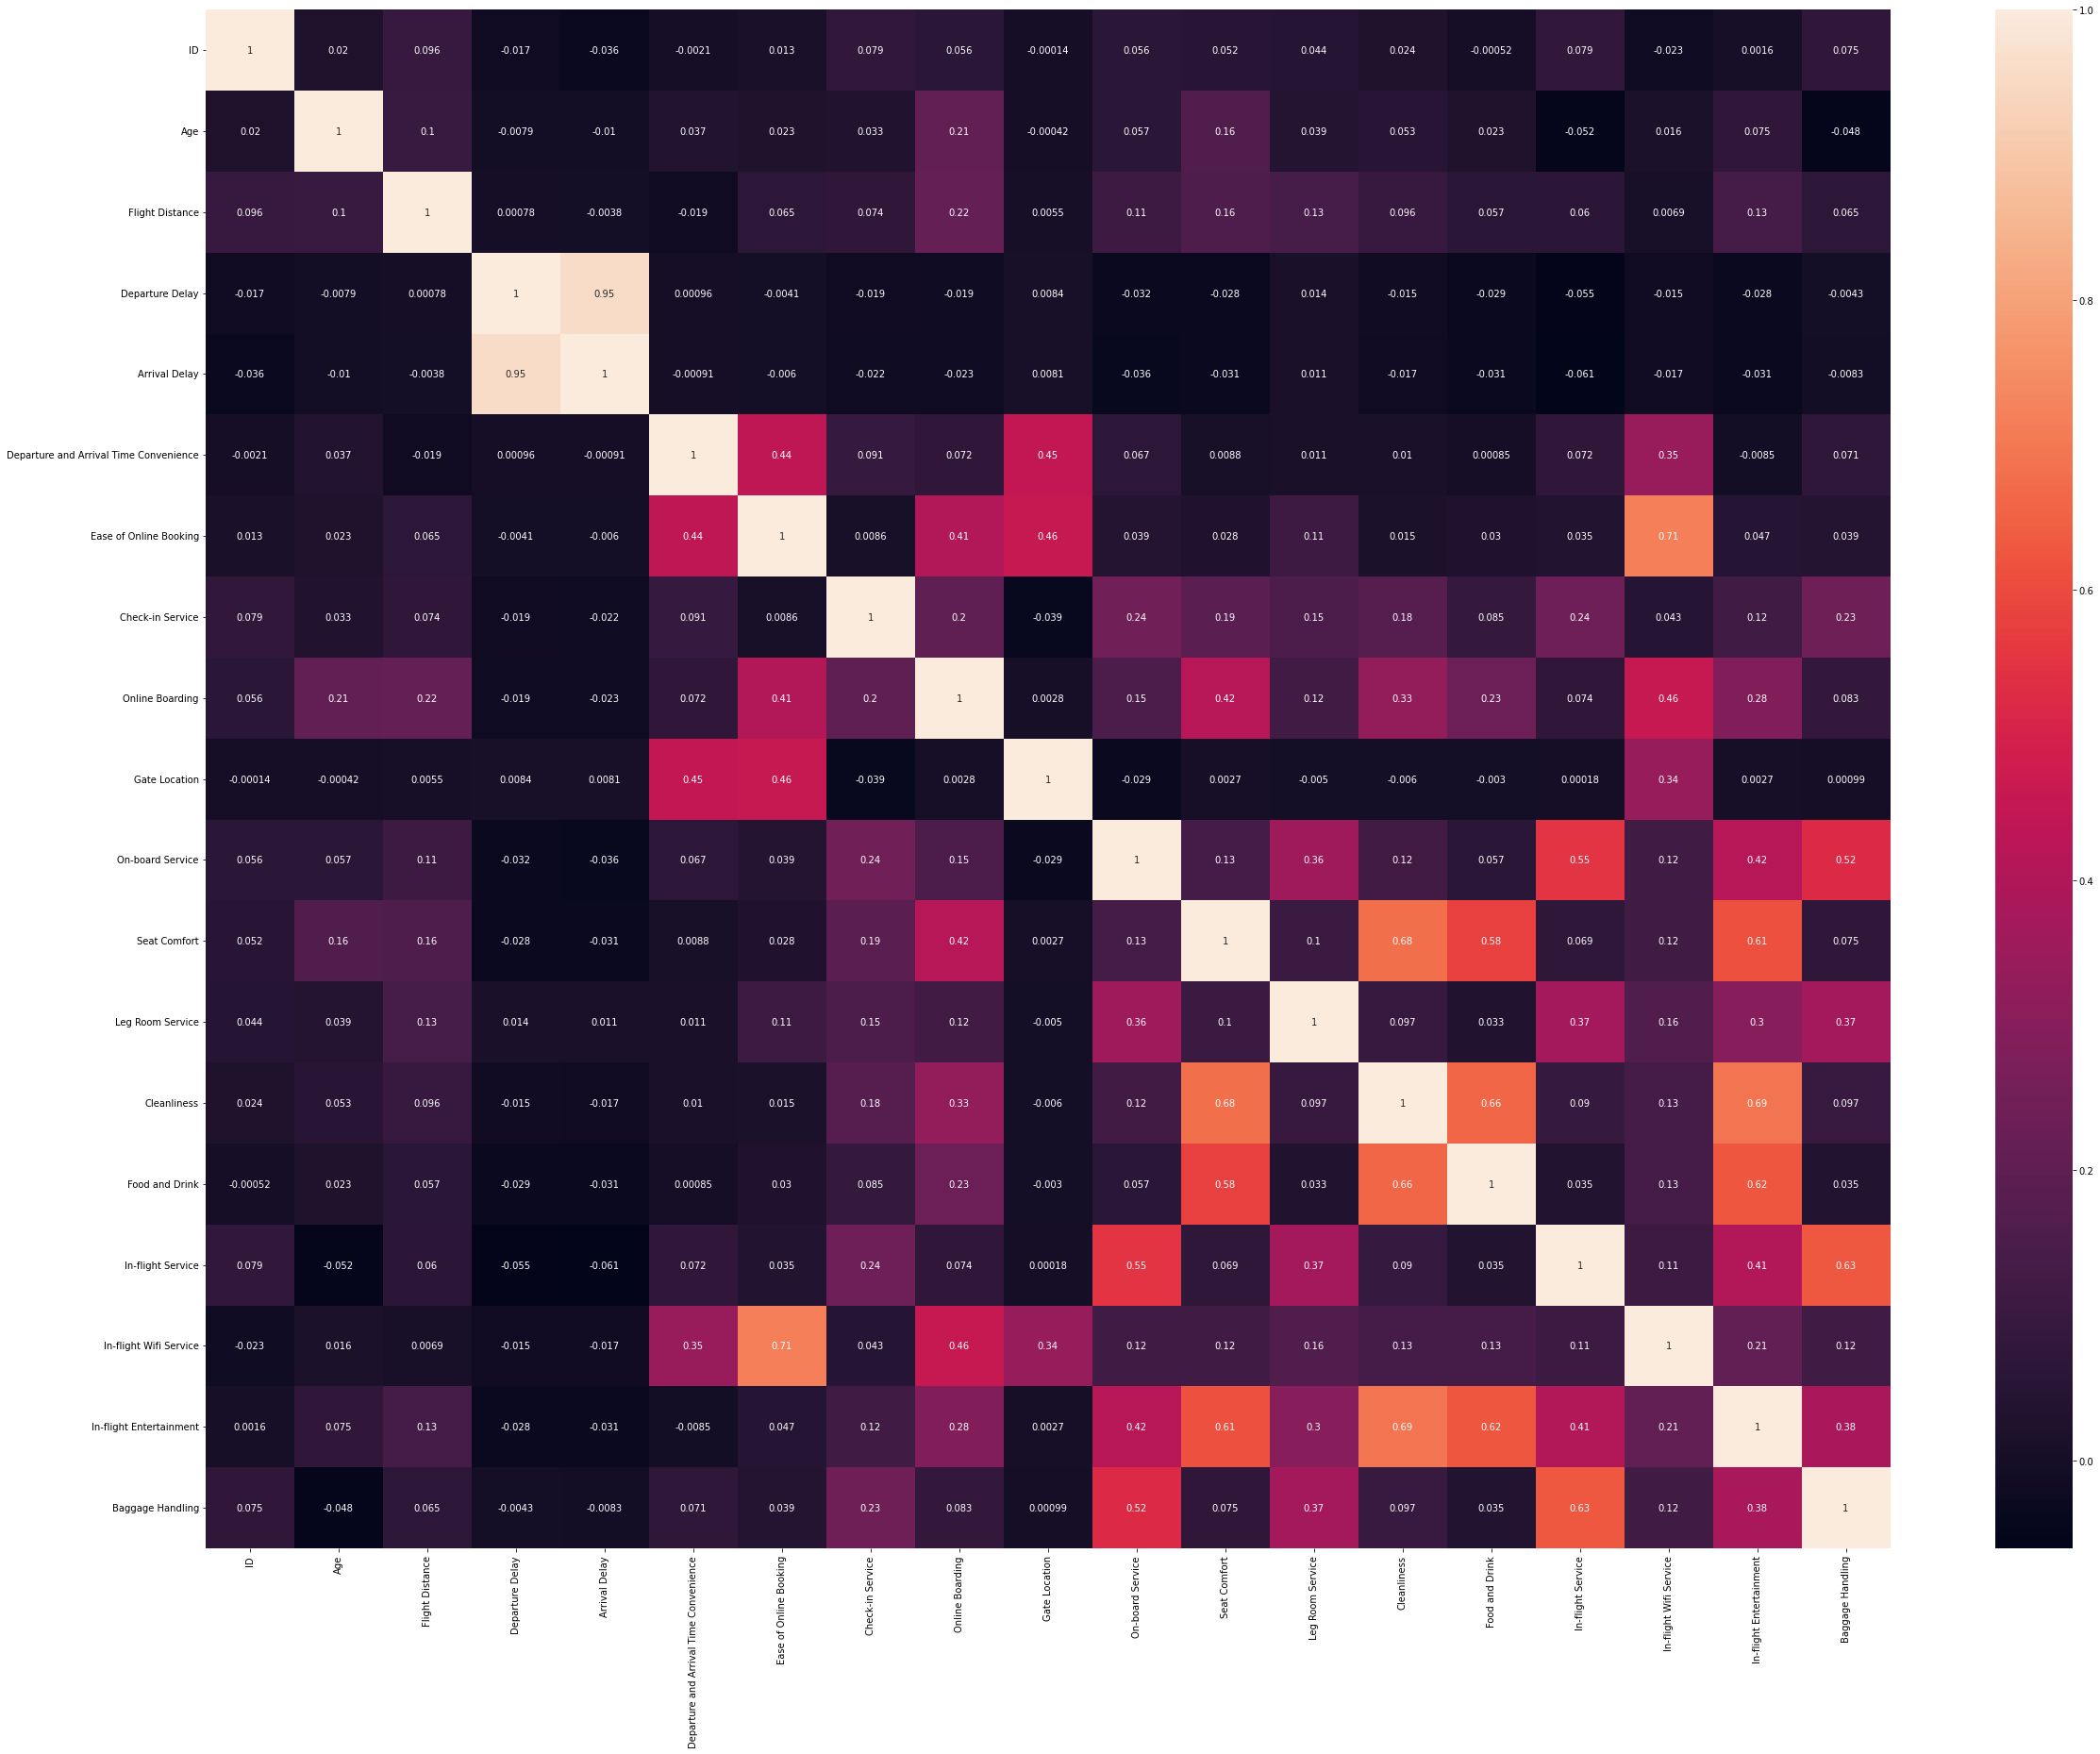

In [16]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

## Observations

- The customers Neutral or Dissatisfaction also increased with the increase in Departure Delay 
- The Demand for Business class and Business class passengers are more satisfied with the increase in flight distance 
- The customer satisfaction increased with the increase of Check-in Service 
- The customers Neutral or Dissatisfaction also increased with the increase in Arrival Delay 
- The customer satisfaction increased with the increase of Ease of Online Booking 
- The customer satisfaction increased with the increase of Seat Comfort 
- The customer satisfaction increased with the increase of Online Boarding 
- The customer satisfaction increased with the increase of Leg Room Service 
- The customer satisfaction increased with the increase of Cleanliness 
- The customer satisfaction increased with the increase of In-flight Wifi Service 
- The customer satisfaction increased with the increase of On-board Service 
- The customer satisfaction increased with the increase of In-flight Service 
- The customer satisfaction increased with the increase of Food and Drink 
- The customer satisfaction increased with the increase of In-flight Entertainment 
- The customer satisfaction increased with the increase of Baggage Handling 

# Label Encoding

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = preprocessing.LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

In [18]:
df.drop(['ID'], axis = 1, inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


# Modeling

In [21]:
x=df.drop(['Satisfaction'], axis=1).values
y=df['Satisfaction'].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### K Nearest Neighbors (KNN) classification model

In [24]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
print(f"Training Score: {KNN_model.score(x_train , y_train)}")
print(f"Test Score: {KNN_model.score(x_test , y_test)}")

Training Score: 0.832028199120319
Test Score: 0.7508324084350722


### Logistic Regression Model

In [26]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [27]:
print(f"Training Score: {lg_model.score(x_train , y_train)}")
print(f"Test Score: {lg_model.score(x_test , y_test)}")

Training Score: 0.809460681547252
Test Score: 0.8095017881366383


### Classification Neural Network

In [28]:
import tensorflow as tf

2022-09-06 21:15:38.181606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 21:15:38.181642: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
2433/2433 [==============================] - 4s 1ms/step - loss: 2.9020 - accuracy: 0.6438 - val_loss: 3.3078 - val_accuracy: 0.5571
Epoch 2/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.7873 - accuracy: 0.7636 - val_loss: 0.3774 - val_accuracy: 0.8528
Epoch 3/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.4953 - accuracy: 0.8078 - val_loss: 0.7153 - val_accuracy: 0.7264
Epoch 4/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.4116 - accuracy: 0.8344 - val_loss: 0.3717 - val_accuracy: 0.8480
Epoch 5/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.4012 - accuracy: 0.8414 - val_loss: 0.3550 - val_accuracy: 0.8623
Epoch 6/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.3897 - accuracy: 0.8458 - val_loss: 0.3614 - val_accuracy: 0.8555
Epoch 7/100
2433/2433 [==============================] - 3s 1ms/step - loss: 0.3781 - accuracy: 0.8522 - val_loss: 0.4189 - val_ac

### Gradient Boosting Model

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
print(f"Training Score: {clf.score(x_train , y_train)}")
print(f"Test Score: {clf.score(x_test , y_test)}")

Training Score: 0.942831010811033
Test Score: 0.941947219139228


### XGBoost

In [25]:
import xgboost as xgb

In [26]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
print(f"Training Score: {xgb_model.score(x_train , y_train)}")
print(f"Test Score: {xgb_model.score(x_test , y_test)}")

Training Score: 0.9756032391992436
Test Score: 0.9631582192625477
